# Siete herramientas nuevas del control de calidad

Las Nuevas Siete Herramientas de Control de Calidad (N7) son principalmente métodos para analizar datos verbales.
Se pueden utilizar para aclarar problemas a partir de situaciones caóticas, enriquecer los planes para asegurar que no se omita nada y guiar la generación de ideas para contramedidas.

En este capítulo, estudiaremos tres técnicas de las Nuevas Siete Herramientas (N7) para que los estudiantes puedan hacer lo siguiente:

* Explicar y calcular los programas de cada plan y la ruta crítica enel método de diagrama de flechas (Arrow Diagrama Method).

* Desarrollar la previsión de situaciones y planificar los métodos de respuesta utilizando el método del proceso de decisión de programa (PDPC - Process Decision Programa Chart).

* Explicar el significado de la terminología utilizada en el método de análisis de datos de matriz (Matrix Data Analysis Method).

[Audio_1](https://drive.google.com/file/d/1l7rqMx4iMH4zjAWsYMAJrITrlEtLgBen/view?usp=drive_link)



## 02-01 Diagrama de red de actividades
アローダイアグラム

* Diagrama de red que representa las relaciones de secuencia de las tareas mediante flechas y puntos de unión

* Gestionar de maner eficiente el progreso de las tareas

* Fecha de punto de unión más temprano
最早結合点日程

* Objetivo de punto de unión más tardío
最遅結合点日程

* Camino crítico クリティカルパス:
El camino cuya diferencia entre la fecha de punto de unión más temprano y la fecha de punto de unión más tardío es cero. Si las tareas en el camino crítico se retrasan, el proyecto se retrasará, por lo que debe gestionarse con especial atención.


## 02-02 Diagrama de causa y efecto (PDPC)
PDPC法

* Prevención de problemas inesperados
* Ampliación progresiva del plan según el desarrollo de la situación
* PDPC de tipo de desarrollo progresivo
* Suposición forzada de situaciones imprevistas y preparaci+on de medidas
* PDPC de tipo de vinculaci+o obligatoria
* Participación de diversas personas con diferentes perspectivas relacionadas con el problema en cuestión
* Prevención anticipada
* Avanzar de manera eficiente hacia el logro de los objetivos
* Es fácil obtener apoyo

## 02-03 Diagrama de matriz (Análisis de componentes principales)
マトリックス・データ解析法

* Valor propio
* Tasa de contribución
* Vector propio
* Carga factorial
* Puntuación de componentes principales
* Criterio de Kaiser

[Audio_2](https://drive.google.com/file/d/1frbh3DPA8c-GgnjwEgGKNobz3ZXbuGr6/view?usp=drive_link)

In [7]:
import os

try:
  os.chdir('../Python/QCKentei')
except:
  pass

path = os.getcwd()

## 2.1

Xプロジェクトのアローダイアグラムが図2.2で表わされている。
1. クリティカルパスを求めよ。
2. 作業Cの所要時間が6分から、４分に短縮できれば、全作業が完了する時間は何分短縮できるか。

El diagrama de flechas del Proyecto X está representado en la Figura 2.2
1. Determina la ruta crítica
2. Si el tiempo requerido para la tarea C se puede reducir de 6 minutos a 4 minutos, ¿cuánto tiempo se puede acortar el tiempo total para completar todas las tareas?

In [8]:
import pandas as pd
import gspread 
from google.oauth2.service_account import Credentials

# 認証情報の設定
SERVICE_ACCOUNT_FILE = "my-project-vscode-452201-249bdb033f8c.json"  # JSONファイルのパス
SCOPES = ["https://www.googleapis.com/auth/spreadsheets"]

credentials = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
client = gspread.authorize(credentials)

# スプレッドシートを開く（URLまたはスプレッドシートIDを使用）
SPREADSHEET_ID = "1RkO0VL4WR6cbPBfBEjz693Lo4SdUAoSvRHV491ggXTo"

sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet6") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()
df = pd.DataFrame(list_of_lists)
df = df.drop(0)
df = df.T

df.columns = df.iloc[0]
df = df.drop(index=0)
df

,A,B
1,60,40
2,50,76
3,51,48
4,42,64
5,55,59
6,46,63
7,49,73
8,52,56
9,43,


In [9]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_pert_graph(graph, critical_path):
    # Ubicación de los nodes
    pos = nx.planar_layout(graph)

    # Dibujar las aristas normales en gris
    plt.figure(figsize=(12, 6))
    labels = nx.get_edge_attributes(graph, 'weight')

    # Obtener las aristas del camino crítico
    edge_colors = ['red' if (u, v) in critical_path else 'gray' for u, v in graph.edges()]

    # Dibujar el gráfico
    nx.draw(graph, pos, with_labels=True, node_size=2000, node_color='lightblue',
            font_size=12, font_weight='bold', edge_color=edge_colors, width=[3 if (u, v) in critical_path else 1 for u, v in graph.edges()])
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels, font_size=10)

    #plt.title('Figura 2.2 Diagrama de flechas del Proyecto X')
    plt.show()

Figura 2.3 Diagrama de flechas del Proyecto X


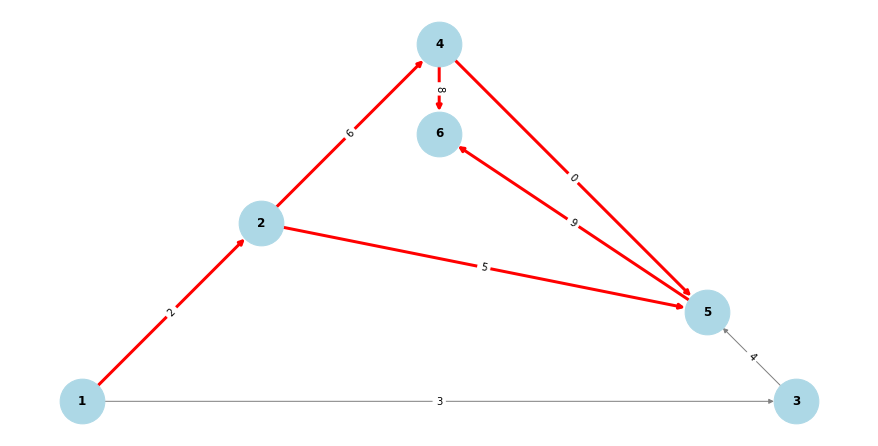

Ruta crítica: 1 -> 2 -> 4 -> 5 -> 6
Todas las tareas: 17 minutos


In [10]:
# Creación del gráfico
graph = nx.DiGraph()

# Agregar nodos (puntos de unión) y aristas (tareas)
graph.add_weighted_edges_from([
    (1, 2, 2),  # A
    (1, 3, 3),  # B
    (2, 4, 6),  # C
    (2, 5, 5),  # D
    (3, 5, 4),  # E
    (4, 5, 0),  # Dummy
    (4, 6, 8),  # F
    (5, 6, 9)   # G
])

# Cálculo del calendario de unión más temprano (ruta hacia adelante)
earliest_times = {node: 0 for node in graph.nodes()}
for node in nx.topological_sort(graph):
    for succ in graph.successors(node):
        earliest_times[succ] = max(earliest_times[succ], earliest_times[node] + graph[node][succ]['weight'])

# Cálculo del calendario de unión más tardío (ruta hacia atrás)
latest_times = {node: earliest_times[max(graph.nodes())] for node in graph.nodes()}
for node in reversed(list(nx.topological_sort(graph))):
    for pred in graph.predecessors(node):
        latest_times[pred] = min(latest_times[pred], latest_times[node] - graph[pred][node]['weight'])


# Identificación del camino crítico
critical_path = []
for node in graph.nodes():
    for succ in graph.successors(node):
        if earliest_times[node] == latest_times[node] and earliest_times[succ] == latest_times[succ]:
            critical_path.append((node, succ))

print('Figura 2.3 Diagrama de flechas del Proyecto X')
# Representar el gráfico
draw_pert_graph(graph, critical_path)


# Cálculo de la ruta crítica
critical_path = nx.algorithms.dag.dag_longest_path(graph, weight='weight')
critical_path_length = nx.algorithms.dag.dag_longest_path_length(graph, weight='weight')
critical_path_length_before = critical_path_length

print(f"Ruta crítica: {' -> '.join(map(str, critical_path))}")
print(f"Todas las tareas: {critical_path_length} minutos")


Figura 2.4 Diagrama de flechas del Proyecto X


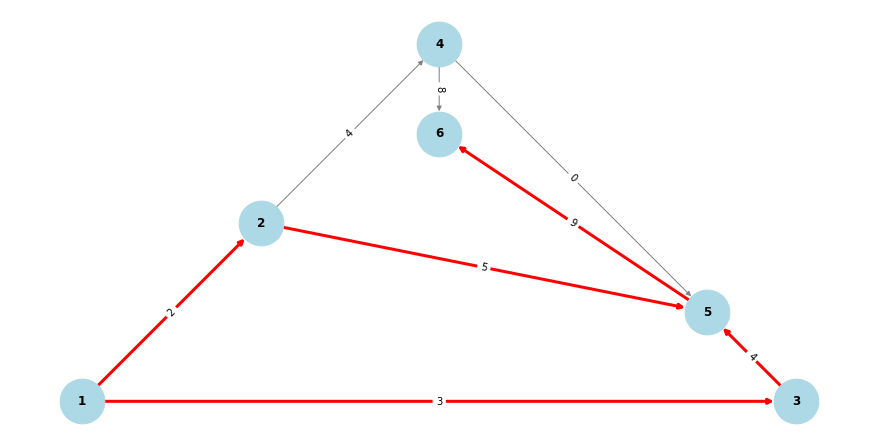

Ruta crítica: 1 -> 2 -> 5 -> 6
Todas las tareas nuevos: 16 minutos
Reducción del tiempo de trabajo: 1 minutos


In [11]:
# Creación del gráfico
graph = nx.DiGraph()

graph.add_weighted_edges_from([
    (1, 2, 2),  # A
    (1, 3, 3),  # B
    (2, 4, 4),  # C (Tiempo de las tareas después del cambio)
    (2, 5, 5),  # D
    (3, 5, 4),  # E
    (4, 5, 0),  # Dummy
    (4, 6, 8),  # F
    (5, 6, 9)   # G
])

# Cálculo del calendario de unión más temprano (ruta hacia adelente)
earliest_times = {node: 0 for node in graph.nodes()}
for node in nx.topological_sort(graph):
    for succ in graph.successors(node):
        earliest_times[succ] = max(earliest_times[succ], earliest_times[node] + graph[node][succ]['weight'])

# Cálculo del calendario de unión más temprano (ruta hacia atrás)
latest_times = {node: earliest_times[max(graph.nodes())] for node in graph.nodes()}
for node in reversed(list(nx.topological_sort(graph))):
    for pred in graph.predecessors(node):
        latest_times[pred] = min(latest_times[pred], latest_times[node] - graph[pred][node]['weight'])


# Identificación del camino crítico
critical_path = []
for node in graph.nodes():
    for succ in graph.successors(node):
        if earliest_times[node] == latest_times[node] and earliest_times[succ] == latest_times[succ]:
            critical_path.append((node, succ))

# Representar el gráfico
print('Figura 2.4 Diagrama de flechas del Proyecto X')
draw_pert_graph(graph, critical_path)

# Cálculo de la ruta crítica
critical_path = nx.algorithms.dag.dag_longest_path(graph, weight='weight')
critical_path_length = nx.algorithms.dag.dag_longest_path_length(graph, weight='weight')

critical_path_length_ = critical_path_length_before - critical_path_length

print(f"Ruta crítica: {' -> '.join(map(str, critical_path))}")
print(f"Todas las tareas nuevos: {critical_path_length} minutos")
print(f"Reducción del tiempo de trabajo: {critical_path_length_} minutos")



## Por favor, responda a las preguntas del examen de práctica a través del siguiente enlace.


[Simulacro de examen](https://forms.gle/eYY47yu2Ht4aDuYS6)

In [12]:
notebook_name = 'QCKentei1-2.ipynb'
notebook_name_html = notebook_name.replace(".ipynb",".html")
print(notebook_name + '  ->  ' + notebook_name_html)

!jupyter nbconvert --to html {notebook_name}

QCKentei1-2.ipynb  ->  QCKentei1-2.html
[NbConvertApp] Converting notebook QCKentei1-2.ipynb to html
[NbConvertApp] Writing 656471 bytes to QCKentei1-2.html
